## Assignment 1
### Name: Gautam Kumar
### Roll Number: 21CS30020

In [1]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../../dataset/linear-regression.csv')
print(df.shape) 

(1599, 12)


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Test train Split
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train , X,Y_train,Y = train_test_split(X,Y,test_size=0.5,random_state=0)
X_val,X_test,Y_val,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
# from sklearn.preprocessing import normalize   
# X_train = normalize(X_train)

In [7]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(799, 11) (799,)
(480, 11) (480,)
(320, 11) (320,)


In [8]:
class l2_regularization():
    def __init__(self,alpha):
        self.alpha = alpha
    
    def __call__(self,Weight):
        loss = np.dot(Weight.T , Weight)
        return self.alpha * 0.5 * float(loss)
    
    def grad(self, Weight):
        return self.alpha* Weight

In [9]:
class linear_regression():
    def __init__(self,n_epoch = 500,learning_rate = 0.0001,use_gradient = False):
        self.epoch = n_epoch
        self.learning_rate = learning_rate
        self.use_gradient = use_gradient
        self.init_weight = None
        self.final_weight = None
        self.cost = []
        self.val_cost = []
        self.l2_regularization = l2_regularization(0.01)
      
    
    def initialize_weights(self, num_features):
        threshold = np.sqrt(1/num_features)
        w = np.random.uniform(-threshold,threshold,(num_features,1))* 0.01
        b = 0
        self.init_weight = np.insert(w,0,b,axis = 0)
    
    
    def train(self,X,Y,X_val,Y_val):
        n_sample,n_feature = X.shape 
        n1_sample = X_val.shape[0]
        x = np.insert(X,0,1,axis = 1)
        y = np.reshape(Y,(n_sample, 1))
        X_val = np.insert(X_val,0,1,axis = 1)
        Y_val = np.reshape(Y_val,(n1_sample, 1))
        if self.use_gradient == True:
            self.initialize_weights(n_feature)
            self.fit_gradient_descent(self.init_weight, x,y,X_val,Y_val)
        else:
            self.fit_analytic(x,y)
      
    
    def fit_analytic(self,X,Y):
        x = np.array(X)
        y = np.array(Y)
        
        XT_X = np.dot(x.T,x)
        XT_X_I_XT= np.dot(inv(XT_X),x.T)
        self.final_weight = np.dot(XT_X_I_XT , y)
     
    
    def fit_gradient_descent(self,weight,X,Y,X_val,Y_val):
        _weight = weight.copy()
        self.cost.append(self.MSE_cost(X,Y,_weight))
        self.val_cost.append(self.MSE_cost(X_val,Y_val,_weight))
        for iter in range(self.epoch):
            _weight = _weight - np.multiply(self.learning_rate, self.gradient_descent(_weight,X,Y))
#             print(self.gradient_descent(_weight,X,Y))
            (self.cost).append(self.MSE_cost(X,Y,_weight))
            (self.val_cost).append(self.MSE_cost(X_val,Y_val,_weight))
            if iter%100 ==0:
                print(f"The training cost for iteration ::{iter} is ________________________________________________{np.squeeze(self.cost[-1])}")
                print(f"The validation cost for iteration ::{iter} is ______________________________________________{np.squeeze(self.val_cost[-1])}","\n")
        self.final_weight = _weight
    
    
    def gradient_descent(self,weight,X,Y):
        m = X.shape[0]
        inner = np.dot(X,weight) - Y
        mul = np.dot(X.T , inner) + (self.l2_regularization).grad(weight)
        return mul/(m)
        
    def MSE_cost(self,X,Y,weight):
        m = X.shape[0]
        diff = ((np.dot(X,weight)) - Y)
        diff_sq = np.dot(diff.T,diff)
        cost = diff_sq/(2*m) + self.l2_regularization(weight)
        return cost

        
    def predict(self,X):
        np.insert(X,0,1,axis = 1)
        y_pred = np.dot(X,self.final_weight)
        return y_pred
        
    
    def Analytic_RMSE_cost(self,X,Y):
        m = X.shape[0]
        X = np.insert(X,0,1,axis = 1)
        Y = np.reshape(Y,(m, 1))
#         print((np.dot(X,self.final_weight)).astype(int) - Y)
        y_pred = np.dot(X,self.final_weight)
        inner = y_pred - Y
        loss = (np.dot(inner.T,inner))/(2*m)
        loss = np.sqrt(loss)
        loss = np.squeeze(loss)
        return loss
    
    def Gradient_RMSE_cost(self,X,Y):
        m = X.shape[0]
        X = np.insert(X,0,1,axis = 1)
        Y = np.reshape(Y,(m,1))
        y_pred = np.dot(X,self.final_weight)
        inner = y_pred - Y
        loss = (np.dot(inner.T,inner))/(2*m)
        loss = np.sqrt(loss)
        loss = np.squeeze(loss)
        return loss
    
    def r2_score(self,X,Y):
        m = X.shape[0]
        X = np.insert(X,0,1,axis = 1)
        Y = np.reshape(Y,(m, 1))
        y_pred = np.dot(X,self.final_weight) 
        return r2_score(Y,y_pred)
    
    def viswalize_plot(self):
        figure, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
        
        nums = np.arange(len(self.cost))
        ax1.plot(nums, np.array(self.cost).reshape((len(self.cost,))))
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Training cost')
        ax1.set_title('Training_cost')
        
        ax2.plot(nums, np.array(self.val_cost).reshape((len(self.val_cost,))))
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('validation cost')
        ax2.set_title('validation_cost')
        plt.tight_layout()
        plt.show()
        

In [10]:
regressor_analytic = linear_regression()
regressor_analytic.train(X_train,Y_train,X_val,Y_val)
RMSE_train = regressor_analytic.Analytic_RMSE_cost(X_train,Y_train)
R2_train = regressor_analytic.r2_score(X_train,Y_train)
RMSE_test = regressor_analytic.Analytic_RMSE_cost(X_test,Y_test)
R2_test = regressor_analytic.r2_score(X_test,Y_test)
mapping = {'RMSE':[RMSE_train,RMSE_test], 'R2':[R2_train,R2_test]}
mapit = pd.DataFrame(mapping,index=['Train', 'Test'])

In [11]:
mapit

,RMSE,R2
Train,0.45565725096906634,0.397593
Test,0.4712886518848852,0.290613


In [12]:
regressor_grad = linear_regression(5000,0.01,True)
regressor_grad.train(X_train,Y_train,X_val,Y_val)


The training cost for iteration ::0 is ________________________________________________16.05214879960626
The validation cost for iteration ::0 is ______________________________________________15.239683487448795 

The training cost for iteration ::100 is ________________________________________________2.386133355307393
The validation cost for iteration ::100 is ______________________________________________8.029385737413001 

The training cost for iteration ::200 is ________________________________________________0.6127507090990749
The validation cost for iteration ::200 is ______________________________________________5.642912463006809 

The training cost for iteration ::300 is ________________________________________________0.3920572517559588
The validation cost for iteration ::300 is ______________________________________________5.458272733761557 

The training cost for iteration ::400 is ________________________________________________0.36853871521195875
The validation cost for iter

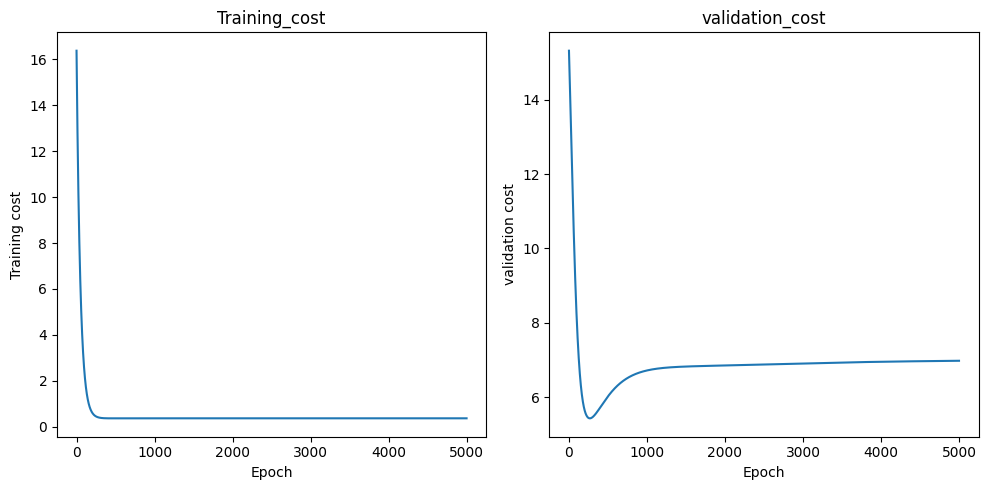

In [13]:
test_RMSE_cost = regressor_grad.Gradient_RMSE_cost(X_test,Y_test)
test_R2_cost = regressor_grad.r2_score(X_test,Y_test)
regressor_grad.viswalize_plot()
mapit = pd.DataFrame([[test_RMSE_cost, test_R2_cost]], columns=['RMSE','R2_Score'], index=['Test(alpha = 0.01)'])

In [14]:
mapit

,RMSE,R2_Score
Test(alpha = 0.01),0.47129034604097897,0.290608


In [15]:
regressor_grad = linear_regression(5000,0.001,True)
regressor_grad.train(X_train,Y_train,X_val,Y_val)


The training cost for iteration ::0 is ________________________________________________16.34181015162137
The validation cost for iteration ::0 is ______________________________________________16.360506055404702 

The training cost for iteration ::100 is ________________________________________________13.403039378735595
The validation cost for iteration ::100 is ______________________________________________15.37179338382972 

The training cost for iteration ::200 is ________________________________________________11.00475716634392
The validation cost for iteration ::200 is ______________________________________________14.39717823023938 

The training cost for iteration ::300 is ________________________________________________9.04702769019007
The validation cost for iteration ::300 is ______________________________________________13.433075788847134 

The training cost for iteration ::400 is ________________________________________________7.448641617442216
The validation cost for iterati

The training cost for iteration ::4900 is ________________________________________________0.3675068015978481
The validation cost for iteration ::4900 is ______________________________________________5.9614090879271115 



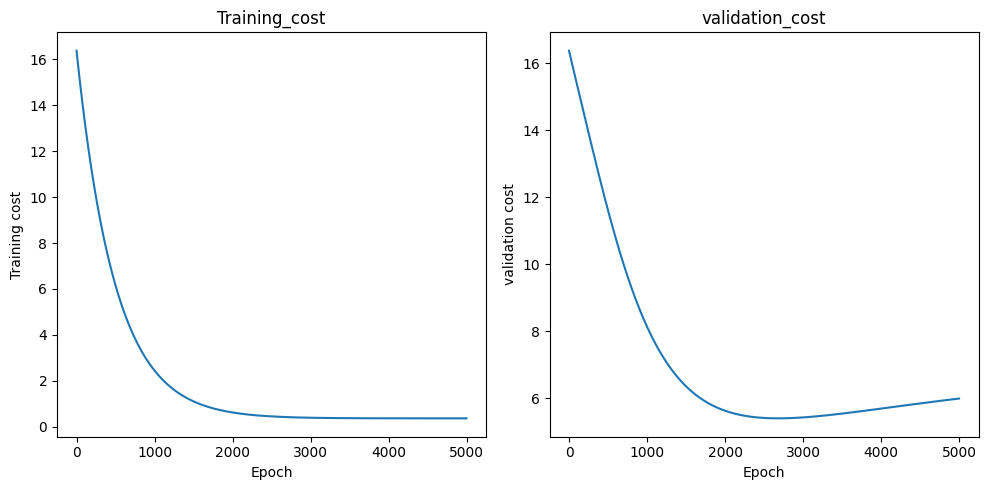

In [16]:
test_RMSE_cost = regressor_grad.Gradient_RMSE_cost(X_test,Y_test)
test_R2_cost = regressor_grad.r2_score(X_test,Y_test)
regressor_grad.viswalize_plot()
mapit = pd.DataFrame([[test_RMSE_cost, test_R2_cost]], columns=['RMSE','R2_Score'], index=['Test(alpha = 0.001)'])

In [17]:
mapit

,RMSE,R2_Score
Test(alpha = 0.001),0.47049633842562527,0.292996


In [18]:
regressor_grad = linear_regression(5000,0.0001,True)
regressor_grad.train(X_train,Y_train,X_val,Y_val)


The training cost for iteration ::0 is ________________________________________________16.370523629949076
The validation cost for iteration ::0 is ______________________________________________15.602374736396838 

The training cost for iteration ::100 is ________________________________________________16.048584970128086
The validation cost for iteration ::100 is ______________________________________________15.505758138447618 

The training cost for iteration ::200 is ________________________________________________15.733130669552848
The validation cost for iteration ::200 is ______________________________________________15.40972146010535 

The training cost for iteration ::300 is ________________________________________________15.424028787519338
The validation cost for iteration ::300 is ______________________________________________15.314190776540663 

The training cost for iteration ::400 is ________________________________________________15.121150138414043
The validation cost for i

The training cost for iteration ::4900 is ________________________________________________6.275705202263823
The validation cost for iteration ::4900 is ______________________________________________11.148945545684283 



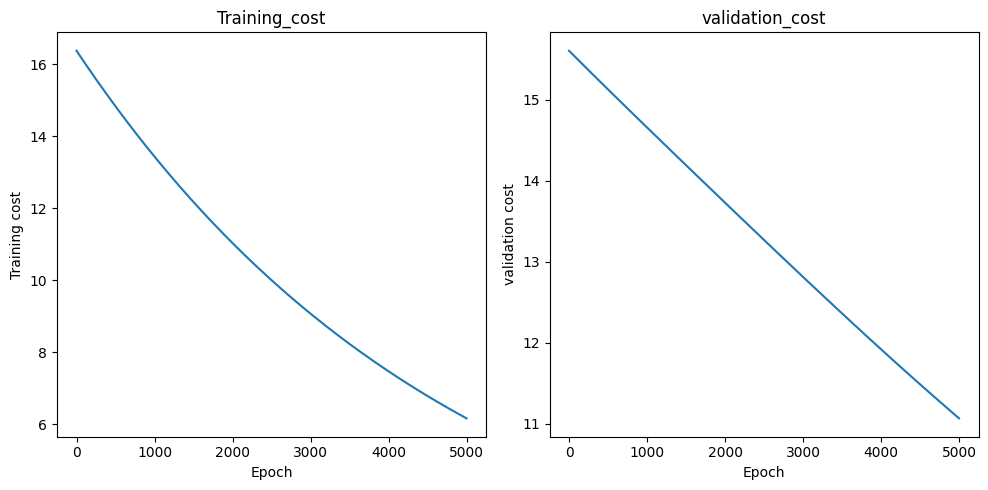

In [19]:
test_RMSE_cost = regressor_grad.Gradient_RMSE_cost(X_test,Y_test)
test_R2_cost = regressor_grad.r2_score(X_test,Y_test)
regressor_grad.viswalize_plot()
mapit = pd.DataFrame([[test_RMSE_cost, test_R2_cost]], columns=['RMSE','R2_Score'], index=['Test(alpha = 0.0001)'])

In [20]:
mapit

,RMSE,R2_Score
Test(alpha = 0.0001),2.435981623591379,-17.952101
